In [232]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics 

In [233]:
#Importing Dataset

df = pd.read_csv("advertising.csv")

In [234]:
#Displaying Dataset

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [235]:
#Checking number of Rows and Columns

df.shape

(200, 4)

In [236]:
#getting additional information about dataset

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [237]:
#getting some statistical information about dataset\

df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [238]:
#Checking for Null values

df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

So, there is no null values

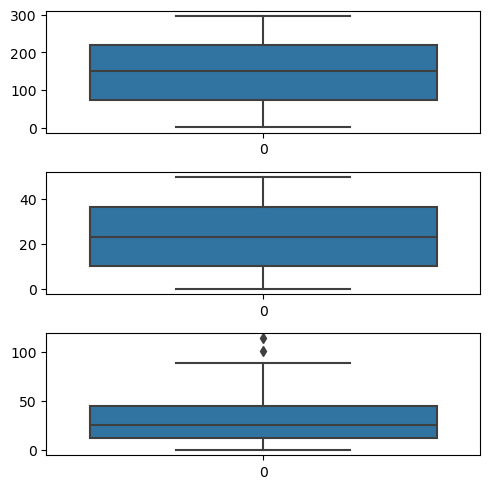

In [239]:
#Outliers Analyses

fig, axs = plt.subplots(3 , figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Radio'], ax = axs[1])
plt3 = sns.boxplot(df['Newspaper'], ax = axs[2])
plt.tight_layout()

So, there are no considerable outliers are present in dataset

In [240]:
#Finding correlation b/w dataset
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


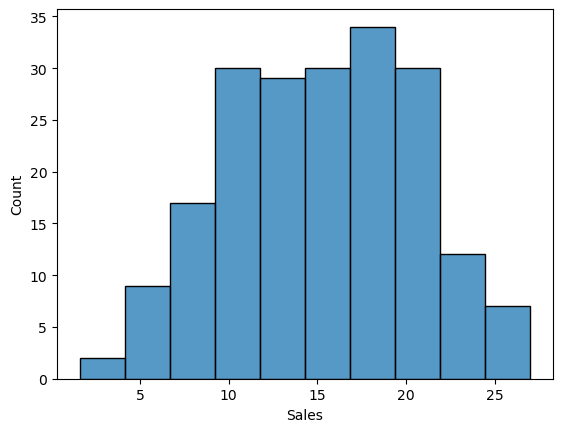

In [241]:
#Visualization

sns.histplot(df['Sales'])
plt.show()

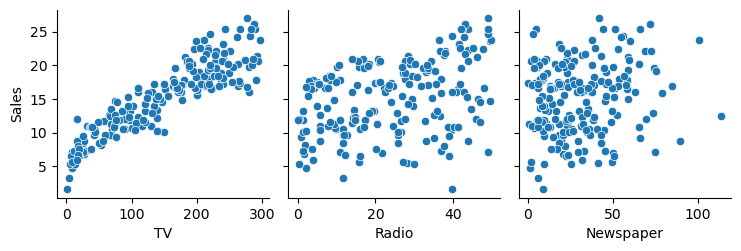

In [242]:

sns.pairplot(df, x_vars = ['TV','Radio', 'Newspaper'], y_vars = 'Sales', kind = 'scatter')
plt.show()

From Correlation and pairplot it is clear that , the TV variable is most correlated with Sales

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Sales via TV advertisemnet')

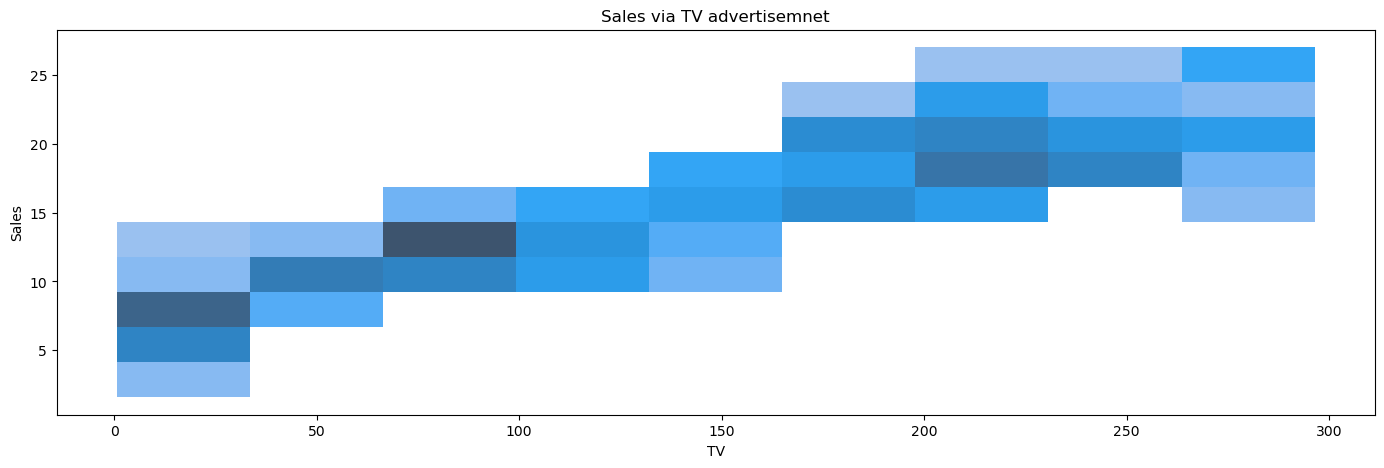

In [243]:
plt.figure(figsize = (17,5))
sns.histplot(x = "TV",y = "Sales", data = df)
plt.title("Sales via TV advertisemnet")

# LINEAR REGRESSION

<Axes: xlabel='TV', ylabel='Sales'>

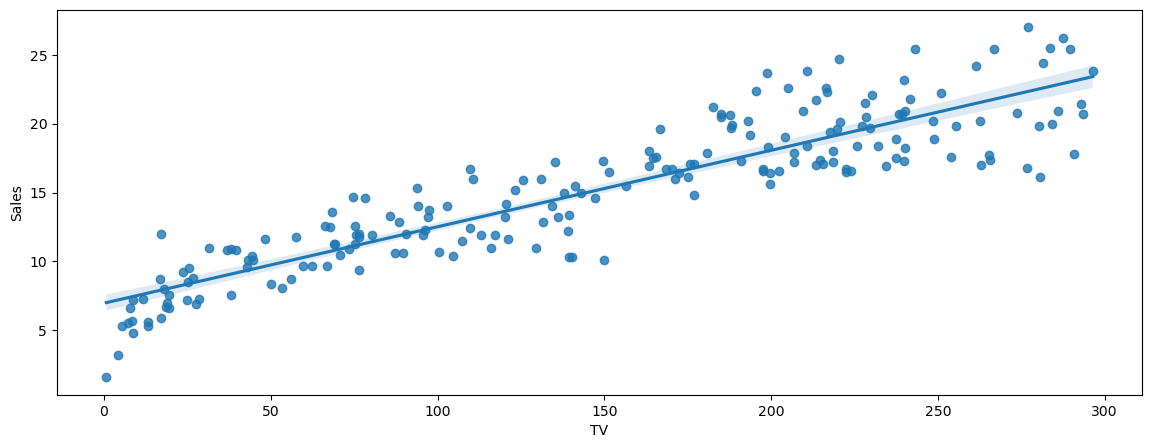

In [244]:
fig, ax = plt.subplots(figsize=(14, 5))

# data.plot.scatter(x='TV Ad Budget ($)', y='Sales ($)', ax=ax)

# regplot will give us a shaded area in which our prediction we lie

sns.regplot(data=df, x='TV', y='Sales', ax=ax)

In [245]:
#Build Model

X = df[['TV']]
y = df[['Sales']]

In [246]:
slr_model = LinearRegression() 

# show data to algorithm
slr_model.fit(X=X,y=y)

LinearRegression()

In [247]:
slope = slr_model.coef_.round(4)
intercept = (slr_model.intercept_)
equation = f"Sales = {slope[0]} * TV + {intercept}"
print(equation)

Sales = [0.0555] * TV + [6.97482149]


Equation --> y = mx +c

In [248]:
#make Prediction

yhat = slr_model.predict(X)

In [249]:
new_Tv_Ad_Budget = 1000

In [250]:
prediction = slr_model.predict(np.array(new_Tv_Ad_Budget).reshape(-1,1))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [251]:
print(f"With Advertising Budget {new_Tv_Ad_Budget} - Sales Prediction is {prediction[0].round(2)}")

With Advertising Budget 1000 - Sales Prediction is [62.44]
